In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%run ./scripts/util_func.py

In [2]:
# import data to dataframe

data = pd.read_csv("/home/dominic/Documents/publications/sensors2021/offline_model_training/powertrain_dynamics_IPEM/data/data.csv") 

data = data.iloc[1:]

print(data)

       Unnamed: 0      ros_time  wheel_meas_index  cmd_left_vel  \
1               1  1.603301e+18               0.0           0.0   
2               2  1.603301e+18               0.0           0.0   
3               3  1.603301e+18               0.0           0.0   
4               4  1.603301e+18               0.0           0.0   
5               5  1.603301e+18               0.0           0.0   
...           ...           ...               ...           ...   
17290       17290  1.603301e+18            3365.0           0.0   
17291       17291  1.603301e+18            3365.0           0.0   
17292       17292  1.603301e+18            3366.0           0.0   
17293       17293  1.603301e+18            3366.0           0.0   
17294       17294  1.603301e+18            3366.0           0.0   

       meas_left_vel  cmd_right_vel  meas_right_vel  
1            0.00000            0.0        0.000000  
2            0.00000            0.0        0.000000  
3            0.00000            0

In [3]:
# convert dataframe to numpy array

array = data.to_numpy()
array =np.delete(array,[0],axis=0)

time_arr = array[:,1]
time_arr = (time_arr - time_arr[0]) * 10**(-9)
meas_index_arr = array[:,2]

left_vel_cmd_arr = array[:,3]
left_vel_meas_arr = array[:,4]
right_vel_cmd_arr = array[:,5]
right_vel_meas_arr = array[:,6]

In [4]:
# Run model on all data

# init tau_c and tau_d values

tau_c = 0.2
tau_d = 0.25

left_model_vel = np.zeros((meas_index_arr.shape[0]))
right_model_vel = np.zeros((meas_index_arr.shape[0]))

for i in range(10, meas_index_arr.shape[0]-1):
    
    dt = (time_arr[i] - time_arr[i-1])
    left_model_vel[i+1] = powerTrain_vel(tau_c, tau_d, left_vel_cmd_arr, left_model_vel, i, dt)
    right_model_vel[i+1] = powerTrain_vel(tau_c, tau_d, right_vel_cmd_arr, right_model_vel, i, dt)

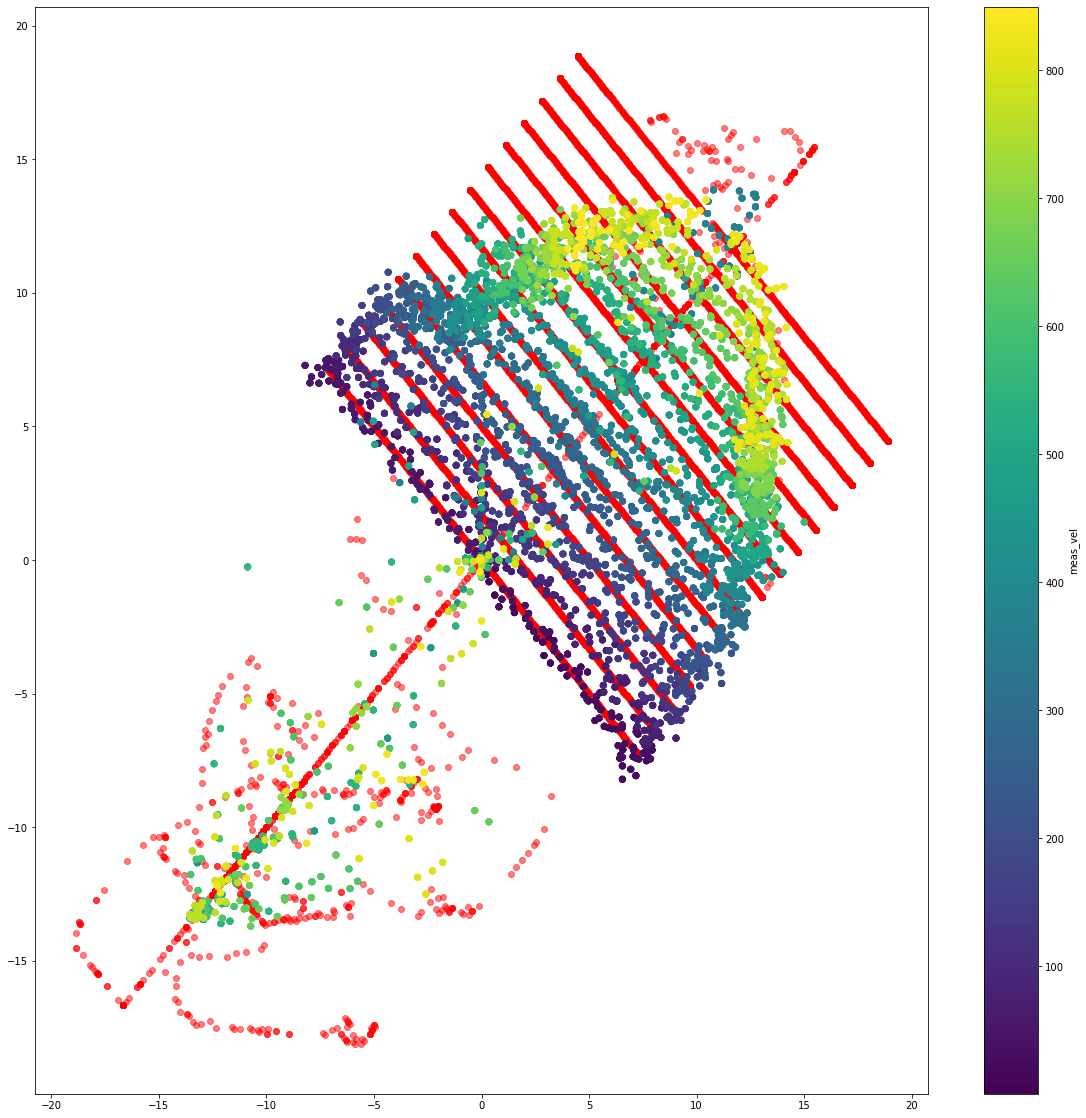

In [5]:
# plot commanded and model wheel velocities
slice_start = 1
slice_end = 17000

fig, ax1 = plt.subplots(figsize=(20, 20))
cmd_vel = ax1.scatter(right_vel_cmd_arr[slice_start:slice_end], left_vel_cmd_arr[slice_start:slice_end], c = 'red', alpha = 0.5, label = 'cmd_vel')
meas_vel = ax1.scatter(right_vel_meas_arr[slice_start:slice_end], left_vel_meas_arr[slice_start:slice_end], c = time_arr[slice_start:slice_end])
fig.colorbar(meas_vel, label='meas_vel')
# plt.plot(time_arr[slice_start:slice_end], left_vel_meas_arr[slice_start:slice_end], c='tab:orange', linestyle='dashed', label='meas_left')
# plt.plot(time_arr[slice_start:slice_end], imu_arr[slice_start:slice_end], c='tab:green', linestyle='dashdot', label='imu_vel')

plt.show()

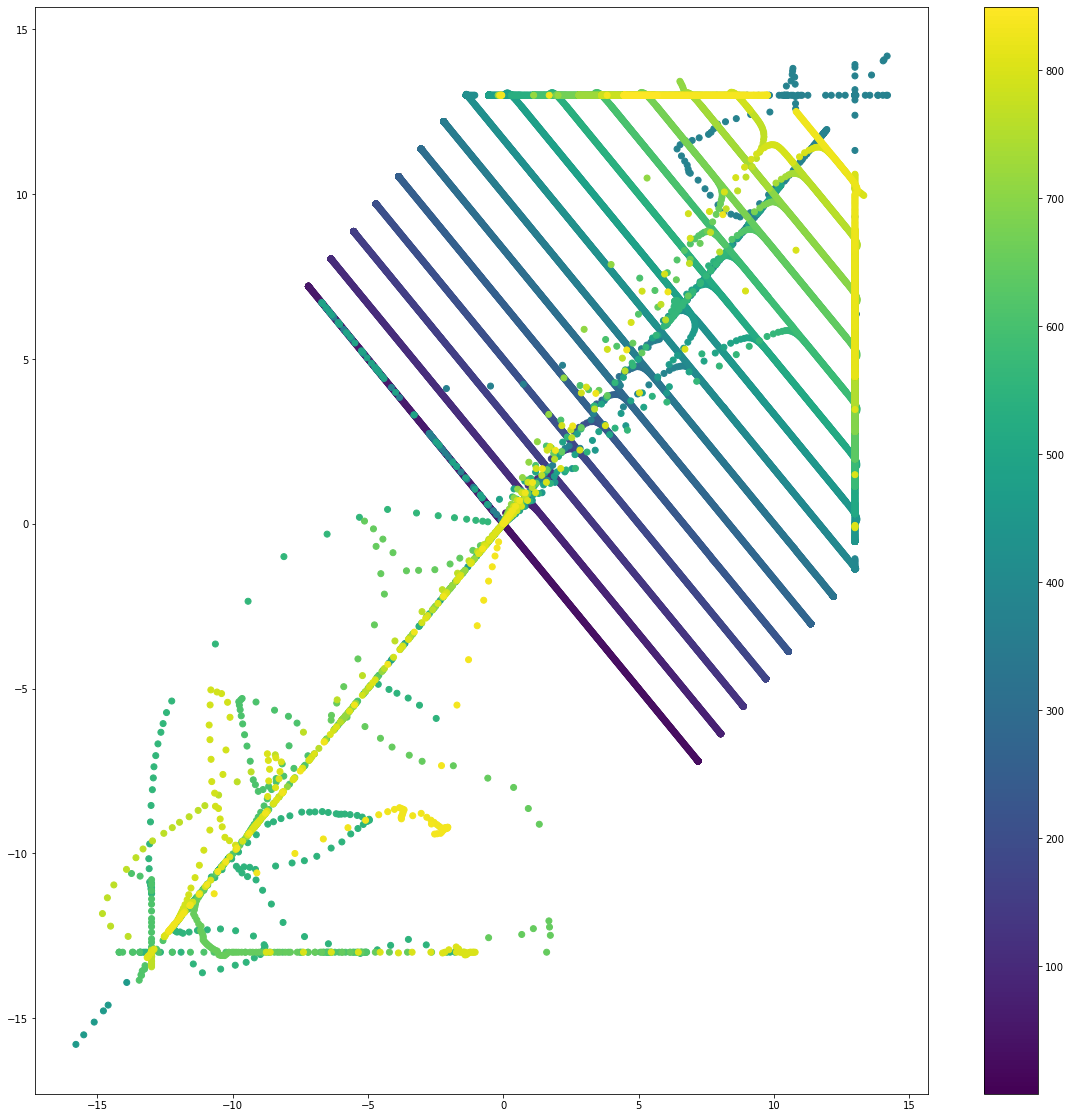

In [6]:
# plot commanded and model wheel velocities
slice_start = 1
slice_end = 17000

fig, ax1 = plt.subplots(figsize=(20, 20))
cmd_vel = ax1.scatter(right_model_vel[slice_start:slice_end], left_model_vel[slice_start:slice_end], c = time_arr[slice_start:slice_end])
fig.colorbar(cmd_vel)
# plt.plot(time_arr[slice_start:slice_end], left_vel_meas_arr[slice_start:slice_end], c='tab:orange', linestyle='dashed', label='meas_left')
# plt.plot(time_arr[slice_start:slice_end], imu_arr[slice_start:slice_end], c='tab:green', linestyle='dashdot', label='imu_vel')

plt.show()